# <font color=Green> Linear Regression Assignment - Bike Sharing Dataset</font>

### Read the Data

Importing data using the pandas library

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import Libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Read the Bike sharing Dataset using pandas 

df=pd.read_csv('/Users/gayatri/Documents/ML/Linear-Regression_Assignment/day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
df.shape

(730, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


#### <font color=purple> Inference : </font>
 <font color=Teal> 
- Bike sharing dataset has 730 rows and 16 columns. 
    
- The columns description explains some fields like seasons,weathersit,weekday are categorical in nature , but happened to be integer/float type.
    
- Let's analyse and decide whether to convert them to categorical or treat as integer.

###  Data quality checks 
     1. Data Cleaning 
     2. Data Inspection

### <font color=Darkblue> 1. Data Cleaning 

#### <font color=brown >1.1 Check for NULL/MISSING values</font>

In [6]:
# percentage of missing values in each column
df.isnull().mean().sort_values(ascending=False)

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

#### <font color=purple> Inference : </font>
<font color=Teal> We can conclude that there are no missing or null values in the data from above 3 functions
- Shape : 730,16 (no: of rows=730)
- info : non-null count for each of the 16 columns is 730
- isnull().mean() : percentage of missing values is 0
- Hence no missing value treatement is required 

#### <font color=Brown> 1.2 Checking for Duplicate values</font>

In [7]:
# Let's create a copy of dataframe and check for duplicates 
df1=df

# Checking for duplicates and dropping the entire duplicate row if any
df1.drop_duplicates(subset=None, inplace=True)

In [8]:
df1.shape

(730, 16)

#### <font color=purple> Inference : </font>
<font color=Teal> We can conclude that there are no duplicates in the given data as the no: of rows remain same post duplicate value check

### <font color=darkBlue> 2. Data Inspection and Preparation  </font>

#### <font color=Brown> 2.1 Inspect columns and drop unused columns in model building

In [9]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

#### <font color=purple> Given column description 
<font color=Teal> 
    - instant: record index
	- dteday : date (we already have seperate columns for 'year' & 'month' we could live without this column.)
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	- weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
    - cnt: count of total rental bikes including both casual and registered 
#### <font color=Blue > NOTE : The linear regression model is built taking this 'cnt' as the target variable.</font>

#### <font color=purple> Inference : </font>
<font color=Teal> From the above column description we can infer that we can drop the below 4 columns.
- instant : An index column which has no effect on target variable.
- dteday  : Can't use a date column directly in model prediction . This variable can be used in feature engineering to extract features like month,day,year which are already available in the date set.So can drop now.  
- casual : This is half target variable.
- registered : This is half target variable.
- cnt = casual + registered

In [10]:
df.drop(['instant', 'dteday','casual','registered'],axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 74.1 KB


####  <font color= purple > Inference :
    
<font color=Teal>
    
- From the data and column desc we can observe that season, yr, mnth, holiday, weekday, workingday, weathersit all are        categorical in nature.
    
- Lets convert the  season, weekday and weathersit into categorical string values.
    
- Reason : Its better to convert to categorical strings as it will be in more understandable format post dummies creation.

In [11]:
df['season']=df['season'].map({1:"spring",2:"summer",3:"fall",4:"winter"})
df.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600
5,spring,0,1,0,6,0,1,8.378268,11.66045,51.8261,6.000868,1606
6,spring,0,1,0,0,0,2,8.057402,10.44195,49.8696,11.304642,1510
7,spring,0,1,0,1,1,2,6.765000,8.11270,53.5833,17.875868,959
8,spring,0,1,0,2,1,1,5.671653,5.80875,43.4167,24.250650,822
9,spring,0,1,0,3,1,1,6.184153,7.54440,48.2917,14.958889,1321


In [12]:
df['weathersit']=df['weathersit'].map({1:"Clear_Few Clouds",2:"Mist_cloudy",3:"Light rain_Light snow_Thunderstorm",4:'Heavy Rain_Ice Pallets_Thunderstorm_Mist'})
df.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,1,1,Mist_cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,2,1,Mist_cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,3,1,Clear_Few Clouds,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,4,1,Clear_Few Clouds,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,5,1,Clear_Few Clouds,9.305237,11.46350,43.6957,12.522300,1600
5,spring,0,1,0,6,0,Clear_Few Clouds,8.378268,11.66045,51.8261,6.000868,1606
6,spring,0,1,0,0,0,Mist_cloudy,8.057402,10.44195,49.8696,11.304642,1510
7,spring,0,1,0,1,1,Mist_cloudy,6.765000,8.11270,53.5833,17.875868,959
8,spring,0,1,0,2,1,Clear_Few Clouds,5.671653,5.80875,43.4167,24.250650,822
9,spring,0,1,0,3,1,Clear_Few Clouds,6.184153,7.54440,48.2917,14.958889,1321


In [13]:
df['weekday']=df['weekday'].map({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thursday",5:"Friday",6:"Saturday"})
df.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,Monday,1,Mist_cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,Tuesday,1,Mist_cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,Wednesday,1,Clear_Few Clouds,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,Thursday,1,Clear_Few Clouds,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,Friday,1,Clear_Few Clouds,9.305237,11.46350,43.6957,12.522300,1600
5,spring,0,1,0,Saturday,0,Clear_Few Clouds,8.378268,11.66045,51.8261,6.000868,1606
6,spring,0,1,0,Sunday,0,Mist_cloudy,8.057402,10.44195,49.8696,11.304642,1510
7,spring,0,1,0,Monday,1,Mist_cloudy,6.765000,8.11270,53.5833,17.875868,959
8,spring,0,1,0,Tuesday,1,Clear_Few Clouds,5.671653,5.80875,43.4167,24.250650,822
9,spring,0,1,0,Wednesday,1,Clear_Few Clouds,6.184153,7.54440,48.2917,14.958889,1321


### EDA : Exploratory Data Analysis

Let's inspect the dataset and perform univariate analysis and bivariate analysis

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 74.1+ KB


In [15]:
df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

### <font color=darkblue>1.Data visualization 

#### Univariate Analysis and Bivariate Analysis

In [16]:
def plotfunc(var):
    plt.figure(figsize=(8,5))
    plot1=sns.countplot(var, data=df)
    plt.title('Distribution of '+ '%s' %var +' for bike rides', fontsize=14)
    plt.xlabel(var)
    plt.xticks(rotation=90)
    plt.ylabel('No:of rides')
    
    for p in plot1.patches:
        plot1.annotate(format(int(p.get_height()),), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=14,
                   xytext = (0, 5), 
                   textcoords = 'offset points')
    plot1.set_xticklabels(plot1.get_xticklabels(),fontsize=12)
    
    plt.show()
    
### seaborn.countplot() method is used to Show the counts of observations in each categorical bin using bars.

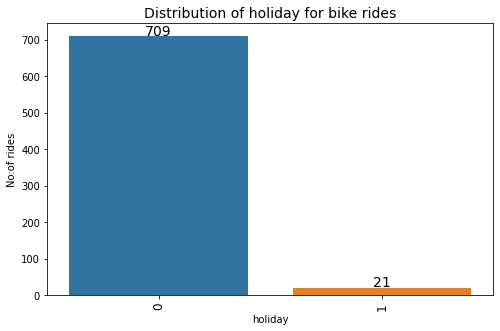

In [103]:
plotfunc('holiday')


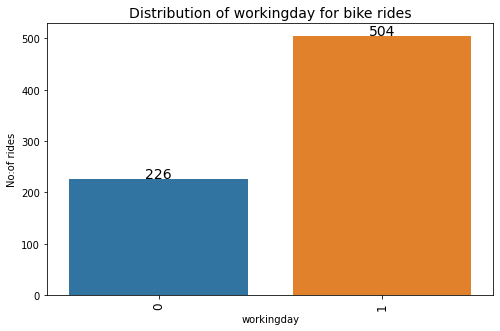

In [18]:
plotfunc('workingday')

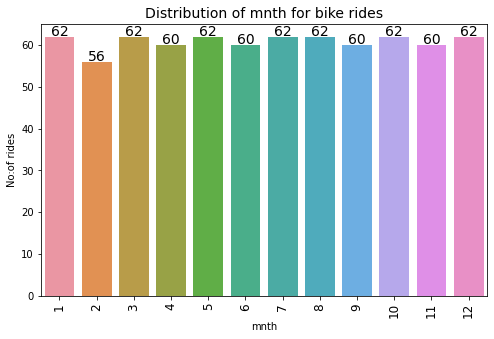

In [19]:
plotfunc('mnth')

#### <font color=brown> 1.1 Numerical variables - Scatter plot 

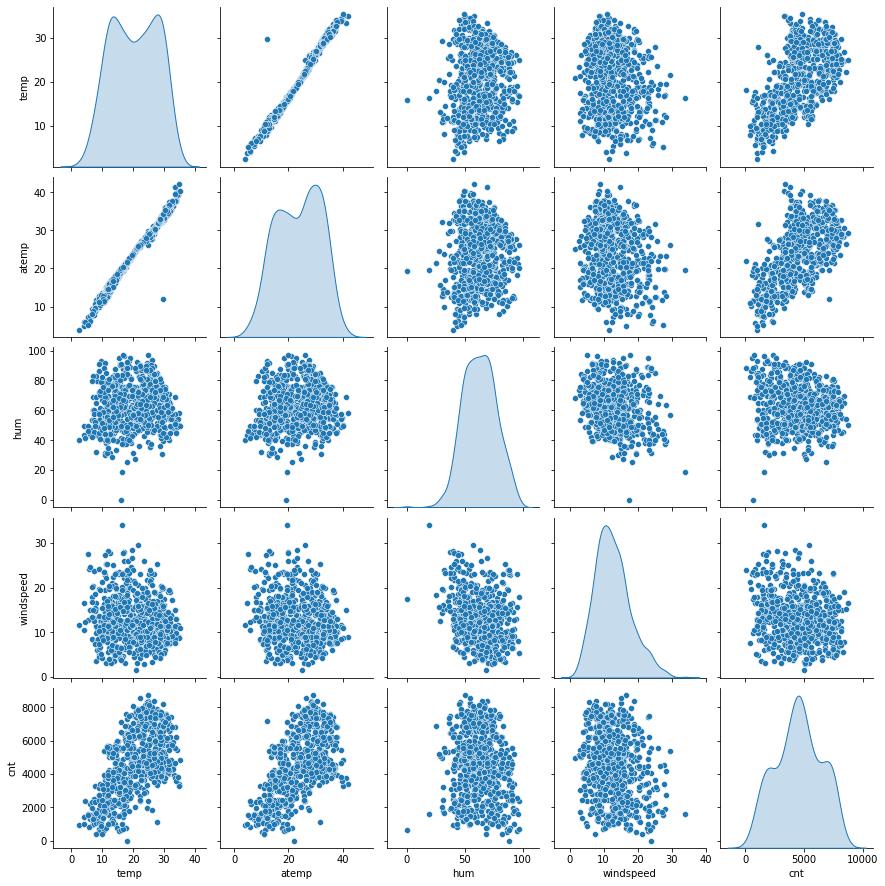

In [20]:
# Create a new dataframe of only numeric variables:

df_num=df[[ 'temp', 'atemp', 'hum', 'windspeed','cnt']]

sns.pairplot(df_num, diag_kind='kde')
plt.show()

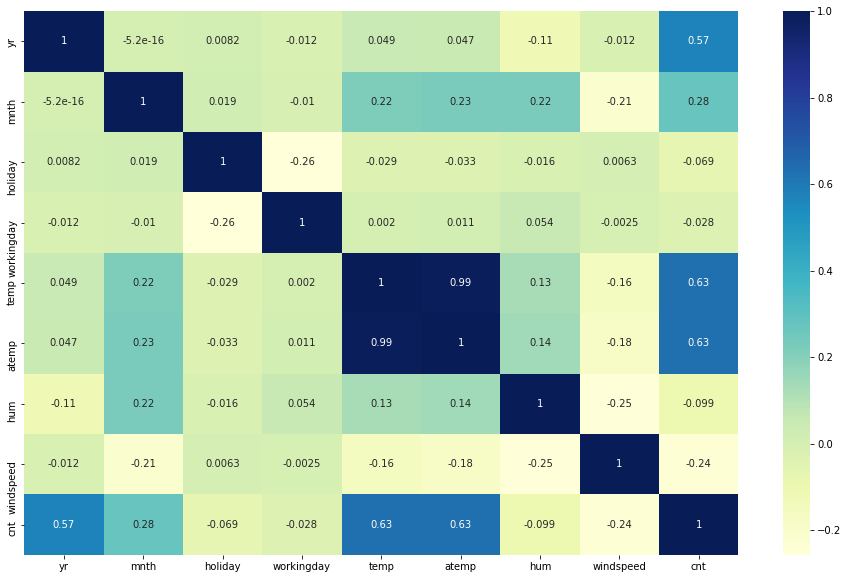

In [21]:
# from above graphs we can say that temp and atemp have a relationship
#let check the correlation
plt.figure(figsize = (16, 10))
sns.heatmap(df.corr(), annot = True, cmap="YlGnBu")
plt.show()

#### <font color= purple >Inference :
    
<font color=Teal>
    We can observe a strong relationship between atemp and temp each other and also with cnt (target) variable.

#### <font color=brown>1.2 Categorical varaibales - Boxplot

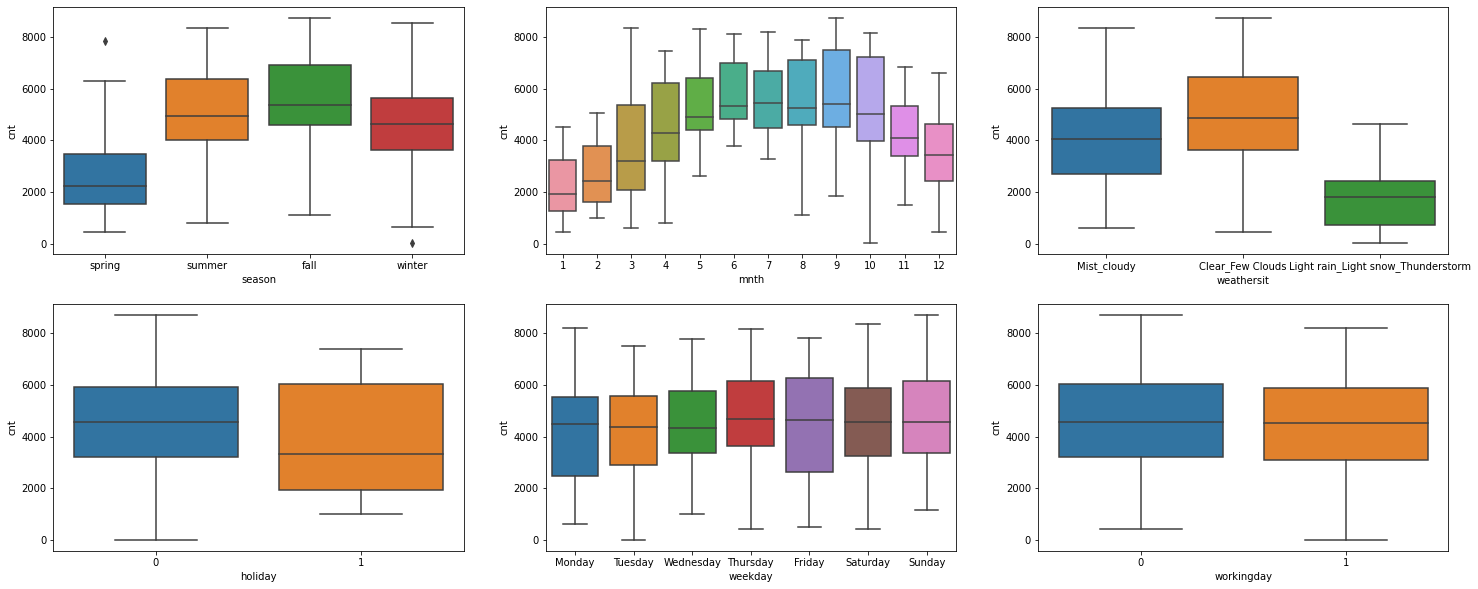

In [22]:
# Build boxplot of all categorical variables (before creating dummies) againt the target variable 'cnt' 
# to see how each of the predictor variable stackup against the target variable.

plt.figure(figsize=(25, 10))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = df)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = df)
plt.subplot(2,3,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)
plt.subplot(2,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)
plt.subplot(2,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = df)
plt.show()

#### <font color=purple> Inference : Effect of 6 categorical variables on target variable 'cnt' is as follows.
    
<font color=Teal> With the help of the below percentage calculations and above box plot medians we can infer the following insights..
    
 - season : season shows 32% of the bike booking were happening in season3 (fall) with a median of over 5000 booking. This was followed by season2 (summer) & season4 (winter) with 27% & 25% of total booking. HEnce we can say that season can be a good predictor for the dependent variable.
    
- mnth : mnth shows 10% of the bike booking were happening in the months 5,6,7,8 & 9 with a median of over 4000 booking per month. So, mnth shows some trend for bookings and it's also a good predictor for the dependent variable.
    
    
- weathersit : weathersit shows 69% of the bike booking were happening during ‘weathersit1 (Clear_Few Clouds) with a median of close to 5000 booking (for the period of 2 years). This was followed by weathersit2 with 30% (Mist_cloudy) of total booking. Weathersit also influence the bike bookings can be a good predictor for the dependent variable. 
    
    
- holiday : holiday shows 98% of the bike booking were happening when it is not a holiday which means this data is clearly biased. Hence holiday is not a good predictor for the dependent variable.
    
    
- weekday : weekday variable shows very close trend . Hence can't say any particular day of the week has good or low number of bookings and also having their independent medians between 4000 to 5000 bookings. This variable can have some or no influence towards the predictor. The model should decide if this needs to be added or not. 
    
    
- workingday: Almost 68% of the bike booking were happening on a workingday with a median of close to 5000 bookings. Hence workingday might be a good predictor for the dependent variable.

In [23]:
season_per=round(df.groupby(by=['season'])['cnt'].sum()/sum(df['cnt']),2)*100
season_per

season
fall      32.0
spring    14.0
summer    28.0
winter    26.0
Name: cnt, dtype: float64

In [24]:
mnth_per=round(df.groupby(by=['mnth'])['cnt'].sum()/sum(df['cnt']),2)*100
mnth_per

mnth
1      4.0
2      5.0
3      7.0
4      8.0
5     10.0
6     11.0
7     10.0
8     11.0
9     11.0
10    10.0
11     8.0
12     6.0
Name: cnt, dtype: float64

In [25]:
weathersit_per=round(df.groupby(by=['weathersit'])['cnt'].sum()/sum(df['cnt']),2)*100
weathersit_per

weathersit
Clear_Few Clouds                      69.0
Light rain_Light snow_Thunderstorm     1.0
Mist_cloudy                           30.0
Name: cnt, dtype: float64

In [26]:
holiday_per=round(df.groupby(by=['holiday'])['cnt'].sum()/sum(df['cnt']),2)*100
holiday_per

holiday
0    98.0
1     2.0
Name: cnt, dtype: float64

In [27]:
weekday_per=round(df.groupby(by=['weekday'])['cnt'].sum()/sum(df['cnt']),2)*100
weekday_per

weekday
Friday       15.0
Monday       14.0
Saturday     15.0
Sunday       15.0
Thursday     15.0
Tuesday      14.0
Wednesday    14.0
Name: cnt, dtype: float64

In [28]:
workingday_per=round(df.groupby(by=['workingday'])['cnt'].sum()/sum(df['cnt']),2)*100
workingday_per

workingday
0    32.0
1    68.0
Name: cnt, dtype: float64

### Dummy variables 

- A dummy variable is a numerical variable used in regression analysis to represent subgroups of the sample in your study. 
- In research design, a dummy variable is often used to distinguish different treatment groups.
- In the simplest case, we would use a 0,1 dummy variable where a person is given a value of 0 if they are in the control group or a 1 if they are in the treated group.
- Dummy variables are useful because they enable us to use a single regression equation to represent multiple groups. - This means that we don’t need to write out separate equation models for each subgroup. The dummy variables act like ‘switches’ that turn various parameters on and off in an equation. 

In [29]:
# Lets convert the categorical variables into category type

df['season']=df['season'].astype('category')
df['weathersit']=df['weathersit'].astype('category')
df['mnth']=df['mnth'].astype('category')
df['weekday']=df['weekday'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(4)
memory usage: 71.4 KB


In [30]:
# This code does 3 things:
# 1) Create Dummy variable
# 2) Drop original variable for which the dummy was created
# 3) Drop first dummy variable for each set of dummies created.

df = pd.get_dummies(df, drop_first=True)


# We will visualise the changes after the dummy creation.

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   yr                                             730 non-null    int64  
 1   holiday                                        730 non-null    int64  
 2   workingday                                     730 non-null    int64  
 3   temp                                           730 non-null    float64
 4   atemp                                          730 non-null    float64
 5   hum                                            730 non-null    float64
 6   windspeed                                      730 non-null    float64
 7   cnt                                            730 non-null    int64  
 8   season_spring                                  730 non-null    uint8  
 9   season_summer                                  730 non

##  Splitting the Data into Training and Testing Sets

As you know, the first basic step for regression is performing a train-test split.

In [31]:
from sklearn.model_selection import train_test_split

# We specify 'random_state' so that the train and test data set always have the same rows, respectively

np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.70, test_size = 0.30, random_state = 100)

In [32]:
print(df_train.shape)

(510, 30)


In [33]:
print(df_test.shape)

(219, 30)


### Rescaling the features

- Differences in the scales across input variables may increase the difficulty of the problem being modeled.
- Hence Rescaling techniques(1. Normalization , 2. Starndadization) are required. (Let's use Normalization (MinMaxScaling) here)

- Normalization is a rescaling of the data from the original range so that all values are within the new range of 0 and 1.
- Attributes are often normalized to lie in a fixed range — usually from zero to one—by dividing all values by the maximum value encountered or by subtracting the minimum value and dividing by the range between the maximum and minimum values.
- A value is normalized as follows:

    y = (x – min) / (max – min)
    Where the minimum and maximum values pertain to the value x being normalized.
    

- Good practice usage with the MinMaxScaler technique is as follows:

      - Fit the scaler using available training data. For normalization, this means the training data will be used to    estimate the minimum and maximum observable values. This is done by calling the fit() function.
      
      - Apply the scale to training data. This means you can use the normalized data to train your model. This is done by calling the transform() function.
      
      - Apply the scale to data going forward. This means you can prepare new data in the future on which you want to make prediction

In [34]:
from sklearn.preprocessing import MinMaxScaler

In [35]:
scaler = MinMaxScaler()

In [36]:
# Checking the values before scaling
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_11,mnth_12,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light rain_Light snow_Thunderstorm,weathersit_Mist_cloudy
653,1,0,1,19.201653,23.0423,55.8333,12.208807,7534,0,0,...,0,0,0,0,0,0,0,1,0,0
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,1,0,...,0,0,0,0,1,0,0,0,0,1
728,1,0,1,10.489153,11.5850,48.3333,23.500518,1796,1,0,...,0,1,1,0,0,0,0,0,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,1,...,0,0,0,0,1,0,0,0,0,1


In [37]:
df_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_spring', 'season_summer', 'season_winter', 'mnth_2',
       'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9',
       'mnth_10', 'mnth_11', 'mnth_12', 'weekday_Monday', 'weekday_Saturday',
       'weekday_Sunday', 'weekday_Thursday', 'weekday_Tuesday',
       'weekday_Wednesday', 'weathersit_Light rain_Light snow_Thunderstorm',
       'weathersit_Mist_cloudy'],
      dtype='object')

In [38]:
# Apply scaler() to all the numeric variables

num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [39]:
# Checking values after scaling
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_11,mnth_12,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light rain_Light snow_Thunderstorm,weathersit_Mist_cloudy
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,0,0,0,0,0,0,0,1,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,0,1,0,0,0,0,1
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,1,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,0,1,0,0,0,0,1


In [40]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_11,mnth_12,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light rain_Light snow_Thunderstorm,weathersit_Mist_cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537262,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,...,0.086275,0.084314,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.029412,0.343137
std,0.500429,0.157763,0.453386,0.225844,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,...,0.281045,0.278131,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Multiple Linear Regression Model

#### <font color=DarkBlue> 1. Let's divide the dataset into Predictors(X) and Traget variable(y) for building the model. 
    
    
#### We use multiple linear regression model for the foloowing reasons..
 - we have a target variable 'cnt' , hence it's a supervised machine learning problem.
 - our dependent variable(y) is continous in nature, hence we use regression method.
 - We have multiple predictors(X),hence we can use multiple linear regression.

In [41]:
y_train = df_train.pop('cnt')
X_train = df_train

####  Feature selection  

- It is a process where you automatically select those features in your data that contribute most to the prediction variable or output in which you are interested.


- Having irrelevant features in your data can decrease the accuracy of many models, especially linear algorithms like linear and logistic regression.


- Three benefits of performing feature selection before modeling your data are:

    - Reduces Overfitting: Less redundant data means less opportunity to make decisions based on noise.
    - Improves Accuracy: Less misleading data means modeling accuracy improves.
    - Reduces Training Time: Less data means that algorithms train faster.

#### RFE : Recursive feature elimination 

- RFE works by searching for a subset of features by starting with all features in the training dataset and successfully removing features until the desired number remains.

- This is achieved by fitting the given machine learning algorithm used in the core of the model, ranking features by importance, discarding the least important features, and re-fitting the model. This process is repeated until a specified number of features remains.

-  We will be using the LinearRegression function from SciKit Learn for its compatibility with RFE (which is a utility from sklearn)


In [42]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [43]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [44]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 5),
 ('temp', True, 1),
 ('atemp', False, 4),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_2', False, 10),
 ('mnth_3', True, 1),
 ('mnth_4', False, 2),
 ('mnth_5', True, 1),
 ('mnth_6', False, 3),
 ('mnth_7', False, 11),
 ('mnth_8', True, 1),
 ('mnth_9', True, 1),
 ('mnth_10', True, 1),
 ('mnth_11', False, 12),
 ('mnth_12', False, 13),
 ('weekday_Monday', False, 9),
 ('weekday_Saturday', False, 6),
 ('weekday_Sunday', False, 7),
 ('weekday_Thursday', False, 15),
 ('weekday_Tuesday', False, 8),
 ('weekday_Wednesday', False, 14),
 ('weathersit_Light rain_Light snow_Thunderstorm', True, 1),
 ('weathersit_Mist_cloudy', True, 1)]

In [45]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_3', 'mnth_5', 'mnth_8',
       'mnth_9', 'mnth_10', 'weathersit_Light rain_Light snow_Thunderstorm',
       'weathersit_Mist_cloudy'],
      dtype='object')

In [46]:
X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'mnth_2', 'mnth_4', 'mnth_6', 'mnth_7',
       'mnth_11', 'mnth_12', 'weekday_Monday', 'weekday_Saturday',
       'weekday_Sunday', 'weekday_Thursday', 'weekday_Tuesday',
       'weekday_Wednesday'],
      dtype='object')

In [47]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

### Building Linear Model using 'STATS MODEL'

#### VIF :

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [48]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,29.50
2,temp,15.39
4,windspeed,4.77
5,season_spring,4.72
7,season_winter,4.33
6,season_summer,3.85
14,weathersit_Mist_cloudy,2.29
0,yr,2.10
10,mnth_8,1.80
9,mnth_5,1.64


In [49]:
import statsmodels.api as sm

# Add a constant
X_train_lm = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [50]:
# Check the parameters obtained

lr.params

const                                            0.281162
yr                                               0.230385
holiday                                         -0.089060
temp                                             0.484667
hum                                             -0.178353
windspeed                                       -0.183595
season_spring                                   -0.043588
season_summer                                    0.071627
season_winter                                    0.109846
mnth_3                                           0.033322
mnth_5                                           0.030660
mnth_8                                           0.051139
mnth_9                                           0.120896
mnth_10                                          0.043662
weathersit_Light rain_Light snow_Thunderstorm   -0.244542
weathersit_Mist_cloudy                          -0.055804
dtype: float64

In [51]:
# Print a summary of the linear regression model obtained
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.3
Date:                Sun, 31 Oct 2021   Prob (F-statistic):          2.95e-189
Time:                        22:57:05   Log-Likelihood:                 514.85
No. Observations:                 510   AIC:                            -997.7
Df Residuals:                     494   BIC:                            -929.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             0.2812      0.036      7.826      0.000       0.211       0.352
yr                                                0.2304      0.008     28.506      0.000       0.215       0.246
holiday                                          -0.0891      0.025     -3.499      0.001      -0.139      -0.039
temp                                              0.4847      0.034     14.073      0.000       0.417       0.552
hum                                              -0.1784      0.038     -4.708      0.000      -0.253      -0.104
windspeed                                        -0.1836      0.026     -7.164      0.000      -0.234      -0.133
season_spring                                    -0.0436      0.023     -1.898      0.058      -0.089       0.002
season_summer                                     0.0716      0.018      3.957      0.000       0.036       0.107
season_winter                                     0.1098      0.020      5.458      0.000       0.070       0.149
mnth_3                                            0.0333      0.015      2.269      0.024       0.004       0.062
mnth_5                                            0.0307      0.018      1.717      0.087      -0.004       0.066
mnth_8                                            0.0511      0.017      2.931      0.004       0.017       0.085
mnth_9                                            0.1209      0.017      7.009      0.000       0.087       0.155
mnth_10                                           0.0437      0.017      2.504      0.013       0.009       0.078
weathersit_Light rain_Light snow_Thunderstorm    -0.2445      0.026     -9.265      0.000      -0.296      -0.193
weathersit_Mist_cloudy                           -0.0558      0.010     -5.340      0.000      -0.076      -0.035
==============================================================================
Omnibus:                       74.688   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              186.962
Skew:                          -0.747   Prob(JB):                     2.52e-41
Kurtosis:                       5.562   Cond. No.                         21.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### <font color=purple>Inference :
<font color=Teal>Drop the variable 'hum' as it has  very high VIF 

In [52]:
X_train_new = X_train_rfe.drop(["hum"], axis = 1)

In [53]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.23
3,windspeed,4.71
5,season_summer,3.05
4,season_spring,2.38
6,season_winter,2.31
0,yr,2.08
9,mnth_8,1.73
8,mnth_5,1.64
11,mnth_10,1.60
13,weathersit_Mist_cloudy,1.58


#### <font color=purple> Note :
<font color=Teal> temp seems to be an important feature for cnt of bike rides hence even its VIF is comparetively high,let's not drop it.

In [54]:
# Add a constant
X_train_lm1 = sm.add_constant(X_train_new)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

In [55]:
# Check the parameters obtained

lr1.params

const                                            0.192998
yr                                               0.234389
holiday                                         -0.090058
temp                                             0.450833
windspeed                                       -0.149773
season_spring                                   -0.056459
season_summer                                    0.064903
season_winter                                    0.092525
mnth_3                                           0.035027
mnth_5                                           0.020101
mnth_8                                           0.045322
mnth_9                                           0.110462
mnth_10                                          0.040484
weathersit_Light rain_Light snow_Thunderstorm   -0.293342
weathersit_Mist_cloudy                          -0.083753
dtype: float64

In [56]:
# Print a summary of the linear regression model obtained
lr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     183.8
Date:                Sun, 31 Oct 2021   Prob (F-statistic):          1.03e-185
Time:                        22:57:05   Log-Likelihood:                 503.66
No. Observations:                 510   AIC:                            -977.3
Df Residuals:                     495   BIC:                            -913.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             0.1930      0.031      6.165      0.000       0.131       0.255
yr                                                0.2344      0.008     28.559      0.000       0.218       0.251
holiday                                          -0.0901      0.026     -3.466      0.001      -0.141      -0.039
temp                                              0.4508      0.034     13.108      0.000       0.383       0.518
windspeed                                        -0.1498      0.025     -5.962      0.000      -0.199      -0.100
season_spring                                    -0.0565      0.023     -2.425      0.016      -0.102      -0.011
season_summer                                     0.0649      0.018      3.522      0.000       0.029       0.101
season_winter                                     0.0925      0.020      4.580      0.000       0.053       0.132
mnth_3                                            0.0350      0.015      2.336      0.020       0.006       0.064
mnth_5                                            0.0201      0.018      1.111      0.267      -0.015       0.056
mnth_8                                            0.0453      0.018      2.550      0.011       0.010       0.080
mnth_9                                            0.1105      0.017      6.324      0.000       0.076       0.145
mnth_10                                           0.0405      0.018      2.275      0.023       0.006       0.075
weathersit_Light rain_Light snow_Thunderstorm    -0.2933      0.025    -11.834      0.000      -0.342      -0.245
weathersit_Mist_cloudy                           -0.0838      0.009     -9.536      0.000      -0.101      -0.066
==============================================================================
Omnibus:                       74.096   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              182.663
Skew:                          -0.747   Prob(JB):                     2.16e-40
Kurtosis:                       5.523   Cond. No.                         19.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
# Drop month_5 as it's p_value >0.05 

X_train_new = X_train_new.drop(["mnth_5"], axis = 1)

In [58]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.11
3,windspeed,4.62
5,season_summer,2.43
4,season_spring,2.35
6,season_winter,2.31
0,yr,2.07
8,mnth_8,1.73
10,mnth_10,1.60
12,weathersit_Mist_cloudy,1.57
9,mnth_9,1.41


In [59]:
# Add a constant
X_train_lm2 = sm.add_constant(X_train_new)

# Create a first fitted model
lr2 = sm.OLS(y_train, X_train_lm2).fit()

In [60]:
# Check the parameters obtained

lr2.params

const                                            0.187386
yr                                               0.233812
holiday                                         -0.090855
temp                                             0.458863
windspeed                                       -0.152215
season_spring                                   -0.051439
season_summer                                    0.074063
season_winter                                    0.095634
mnth_3                                           0.031790
mnth_8                                           0.045169
mnth_9                                           0.110433
mnth_10                                          0.039550
weathersit_Light rain_Light snow_Thunderstorm   -0.293288
weathersit_Mist_cloudy                          -0.082987
dtype: float64

In [61]:
# Print a summary of the linear regression model obtained
lr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.7
Date:                Sun, 31 Oct 2021   Prob (F-statistic):          1.33e-186
Time:                        22:57:05   Log-Likelihood:                 503.02
No. Observations:                 510   AIC:                            -978.0
Df Residuals:                     496   BIC:                            -918.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             0.1874      0.031      6.063      0.000       0.127       0.248
yr                                                0.2338      0.008     28.539      0.000       0.218       0.250
holiday                                          -0.0909      0.026     -3.497      0.001      -0.142      -0.040
temp                                              0.4589      0.034     13.643      0.000       0.393       0.525
windspeed                                        -0.1522      0.025     -6.081      0.000      -0.201      -0.103
season_spring                                    -0.0514      0.023     -2.252      0.025      -0.096      -0.007
season_summer                                     0.0741      0.016      4.493      0.000       0.042       0.106
season_winter                                     0.0956      0.020      4.778      0.000       0.056       0.135
mnth_3                                            0.0318      0.015      2.161      0.031       0.003       0.061
mnth_8                                            0.0452      0.018      2.541      0.011       0.010       0.080
mnth_9                                            0.1104      0.017      6.321      0.000       0.076       0.145
mnth_10                                           0.0395      0.018      2.225      0.027       0.005       0.074
weathersit_Light rain_Light snow_Thunderstorm    -0.2933      0.025    -11.829      0.000      -0.342      -0.245
weathersit_Mist_cloudy                           -0.0830      0.009     -9.476      0.000      -0.100      -0.066
==============================================================================
Omnibus:                       72.205   Durbin-Watson:                   2.035
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              171.532
Skew:                          -0.741   Prob(JB):                     5.65e-38
Kurtosis:                       5.424   Cond. No.                         18.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
# Drop windspeed has VIF>2

X_train_new = X_train_new.drop(["windspeed"], axis = 1)

In [63]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.29
4,season_summer,2.13
0,yr,2.07
5,season_winter,2.07
7,mnth_8,1.72
3,season_spring,1.68
9,mnth_10,1.60
11,weathersit_Mist_cloudy,1.57
8,mnth_9,1.40
6,mnth_3,1.29


In [64]:
# Add a constant
X_train_lm3 = sm.add_constant(X_train_new)

# Create a first fitted model
lr3 = sm.OLS(y_train, X_train_lm3).fit()

In [65]:
lr3.params

const                                            0.134183
yr                                               0.232749
holiday                                         -0.094408
temp                                             0.473243
season_spring                                   -0.057989
season_summer                                    0.065888
season_winter                                    0.099617
mnth_3                                           0.026704
mnth_8                                           0.046758
mnth_9                                           0.115238
mnth_10                                          0.035551
weathersit_Light rain_Light snow_Thunderstorm   -0.307290
weathersit_Mist_cloudy                          -0.081231
dtype: float64

In [66]:
lr3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     196.9
Date:                Sun, 31 Oct 2021   Prob (F-statistic):          4.76e-180
Time:                        22:57:05   Log-Likelihood:                 484.69
No. Observations:                 510   AIC:                            -943.4
Df Residuals:                     497   BIC:                            -888.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             0.1342      0.031      4.372      0.000       0.074       0.194
yr                                                0.2327      0.008     27.440      0.000       0.216       0.249
holiday                                          -0.0944      0.027     -3.510      0.000      -0.147      -0.042
temp                                              0.4732      0.035     13.621      0.000       0.405       0.542
season_spring                                    -0.0580      0.024     -2.454      0.014      -0.104      -0.012
season_summer                                     0.0659      0.017      3.872      0.000       0.032       0.099
season_winter                                     0.0996      0.021      4.809      0.000       0.059       0.140
mnth_3                                            0.0267      0.015      1.756      0.080      -0.003       0.057
mnth_8                                            0.0468      0.018      2.540      0.011       0.011       0.083
mnth_9                                            0.1152      0.018      6.376      0.000       0.080       0.151
mnth_10                                           0.0356      0.018      1.933      0.054      -0.001       0.072
weathersit_Light rain_Light snow_Thunderstorm    -0.3073      0.026    -12.020      0.000      -0.358      -0.257
weathersit_Mist_cloudy                           -0.0812      0.009     -8.962      0.000      -0.099      -0.063
==============================================================================
Omnibus:                       78.941   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              202.558
Skew:                          -0.779   Prob(JB):                     1.04e-44
Kurtosis:                       5.665   Cond. No.                         18.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [68]:
# drop month_3 as it's p value>0.05

X_train_new = X_train_new.drop(["mnth_3"], axis = 1)

In [69]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.29
0,yr,2.07
4,season_summer,2.07
5,season_winter,2.07
6,mnth_8,1.72
8,mnth_10,1.60
10,weathersit_Mist_cloudy,1.57
3,season_spring,1.46
7,mnth_9,1.40
9,weathersit_Light rain_Light snow_Thunderstorm,1.08


In [70]:
# Add a constant
X_train_lm4 = sm.add_constant(X_train_new)

# Create a first fitted model
lr4 = sm.OLS(y_train, X_train_lm4).fit()

In [71]:
lr4.params

const                                            0.132162
yr                                               0.232796
holiday                                         -0.097411
temp                                             0.475716
season_spring                                   -0.049690
season_summer                                    0.070326
season_winter                                    0.100720
mnth_8                                           0.046817
mnth_9                                           0.115375
mnth_10                                          0.035024
weathersit_Light rain_Light snow_Thunderstorm   -0.305066
weathersit_Mist_cloudy                          -0.081386
dtype: float64

In [72]:
lr4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     213.6
Date:                Sun, 31 Oct 2021   Prob (F-statistic):          1.47e-180
Time:                        23:03:13   Log-Likelihood:                 483.11
No. Observations:                 510   AIC:                            -942.2
Df Residuals:                     498   BIC:                            -891.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             0.1322      0.031      4.300      0.000       0.072       0.193
yr                                                0.2328      0.008     27.389      0.000       0.216       0.249
holiday                                          -0.0974      0.027     -3.621      0.000      -0.150      -0.045
temp                                              0.4757      0.035     13.675      0.000       0.407       0.544
season_spring                                    -0.0497      0.023     -2.142      0.033      -0.095      -0.004
season_summer                                     0.0703      0.017      4.171      0.000       0.037       0.103
season_winter                                     0.1007      0.021      4.854      0.000       0.060       0.141
mnth_8                                            0.0468      0.018      2.538      0.011       0.011       0.083
mnth_9                                            0.1154      0.018      6.370      0.000       0.080       0.151
mnth_10                                           0.0350      0.018      1.900      0.058      -0.001       0.071
weathersit_Light rain_Light snow_Thunderstorm    -0.3051      0.026    -11.923      0.000      -0.355      -0.255
weathersit_Mist_cloudy                           -0.0814      0.009     -8.960      0.000      -0.099      -0.064
==============================================================================
Omnibus:                       77.470   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              210.739
Skew:                          -0.746   Prob(JB):                     1.73e-46
Kurtosis:                       5.773   Cond. No.                         17.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [73]:
# drop month_10 as it's p value>0.05

X_train_new = X_train_new.drop(["mnth_10"], axis = 1)

In [74]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.20
0,yr,2.07
4,season_summer,2.05
6,mnth_8,1.71
5,season_winter,1.65
9,weathersit_Mist_cloudy,1.57
3,season_spring,1.46
7,mnth_9,1.37
8,weathersit_Light rain_Light snow_Thunderstorm,1.07
1,holiday,1.04


In [75]:
# Add a constant
X_train_lm5 = sm.add_constant(X_train_new)

# Create a first fitted model
lr5 = sm.OLS(y_train, X_train_lm5).fit()

In [76]:
lr5.params

const                                            0.121258
yr                                               0.232362
holiday                                         -0.098764
temp                                             0.490846
season_spring                                   -0.043381
season_summer                                    0.072192
season_winter                                    0.116861
mnth_8                                           0.045504
mnth_9                                           0.111878
weathersit_Light rain_Light snow_Thunderstorm   -0.298995
weathersit_Mist_cloudy                          -0.080599
dtype: float64

In [77]:
lr5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     233.3
Date:                Sun, 31 Oct 2021   Prob (F-statistic):          5.63e-181
Time:                        23:08:33   Log-Likelihood:                 481.27
No. Observations:                 510   AIC:                            -940.5
Df Residuals:                     499   BIC:                            -894.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             0.1213      0.030      4.005      0.000       0.062       0.181
yr                                                0.2324      0.009     27.276      0.000       0.216       0.249
holiday                                          -0.0988      0.027     -3.663      0.000      -0.152      -0.046
temp                                              0.4908      0.034     14.457      0.000       0.424       0.558
season_spring                                    -0.0434      0.023     -1.884      0.060      -0.089       0.002
season_summer                                     0.0722      0.017      4.278      0.000       0.039       0.105
season_winter                                     0.1169      0.019      6.157      0.000       0.080       0.154
mnth_8                                            0.0455      0.018      2.462      0.014       0.009       0.082
mnth_9                                            0.1119      0.018      6.193      0.000       0.076       0.147
weathersit_Light rain_Light snow_Thunderstorm    -0.2990      0.025    -11.747      0.000      -0.349      -0.249
weathersit_Mist_cloudy                           -0.0806      0.009     -8.860      0.000      -0.098      -0.063
==============================================================================
Omnibus:                       67.800   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              170.000
Skew:                          -0.680   Prob(JB):                     1.22e-37
Kurtosis:                       5.479   Cond. No.                         17.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [78]:
# drop season_spring as it's p value>0.05

X_train_new = X_train_new.drop(["season_spring"], axis = 1)

In [79]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,3.92
0,yr,1.94
3,season_summer,1.78
5,mnth_8,1.56
4,season_winter,1.47
8,weathersit_Mist_cloudy,1.44
6,mnth_9,1.29
7,weathersit_Light rain_Light snow_Thunderstorm,1.06
1,holiday,1.03


In [80]:
# Add a constant
X_train_lm6 = sm.add_constant(X_train_new)

# Create a first fitted model
lr6 = sm.OLS(y_train, X_train_lm6).fit()

In [83]:
lr6.params

const                                            0.070264
yr                                               0.231263
holiday                                         -0.100177
temp                                             0.539040
season_summer                                    0.095578
season_winter                                    0.146153
mnth_8                                           0.058455
mnth_9                                           0.123609
weathersit_Light rain_Light snow_Thunderstorm   -0.297362
weathersit_Mist_cloudy                          -0.080930
dtype: float64

In [82]:
lr6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     257.6
Date:                Sun, 31 Oct 2021   Prob (F-statistic):          1.99e-181
Time:                        23:10:27   Log-Likelihood:                 479.46
No. Observations:                 510   AIC:                            -938.9
Df Residuals:                     500   BIC:                            -896.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             0.0703      0.014      5.164      0.000       0.044       0.097
yr                                                0.2313      0.009     27.142      0.000       0.215       0.248
holiday                                          -0.1002      0.027     -3.707      0.000      -0.153      -0.047
temp                                              0.5390      0.022     24.080      0.000       0.495       0.583
season_summer                                     0.0956      0.011      8.336      0.000       0.073       0.118
season_winter                                     0.1462      0.011     13.389      0.000       0.125       0.168
mnth_8                                            0.0585      0.017      3.399      0.001       0.025       0.092
mnth_9                                            0.1236      0.017      7.270      0.000       0.090       0.157
weathersit_Light rain_Light snow_Thunderstorm    -0.2974      0.026    -11.660      0.000      -0.347      -0.247
weathersit_Mist_cloudy                           -0.0809      0.009     -8.875      0.000      -0.099      -0.063
==============================================================================
Omnibus:                       62.948   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              146.343
Skew:                          -0.658   Prob(JB):                     1.67e-32
Kurtosis:                       5.270   Cond. No.                         9.16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### <font color=purple> Inference : 
    
<font olor=Teal> This model looks good because of following reasons..
   - R^2 and adjusted R^2 are around 81% which is very good value.
   - Multicollinearity is low (as VIF is not so high except for 'temp' which we consider as important feature) among the predictors.
   - The p-values for all the predictors seems to be significant. (< 0.05)
   - Hence this will be our final model.

### Hypothesis testing 

Hypothesis testing states that:

- Null hypothesis  𝐻0: when 𝐵1=𝐵2=...=𝐵𝑛=0 (where B1,B2...Bn are coefficients of X of multiple linear equation)

        - The null hypothesis states that all the sample means are equal or the factor did not have any significant effect on the results

- Alternate hypothesis  𝐻1:  at least one  𝐵𝑖!=0

        - The alternate hypothesis states that at least one of the sample means is different from another

#### KEY TAKEAWAYS about coefficients:

- Correlation coefficients are used to measure the strength of the linear relationship between two variables.
- A correlation coefficient greater than zero indicates a positive relationship while a value less than zero signifies a negative relationship.
- A value of zero indicates no relationship between the two variables being compared.
- The possible range of values for the correlation coefficient is -1.0 to 1.0.
- When interpreting correlation, it's important to remember that just because two variables are correlated, it does not mean that one causes the other.

In [84]:
lr6.params

const                                            0.070264
yr                                               0.231263
holiday                                         -0.100177
temp                                             0.539040
season_summer                                    0.095578
season_winter                                    0.146153
mnth_8                                           0.058455
mnth_9                                           0.123609
weathersit_Light rain_Light snow_Thunderstorm   -0.297362
weathersit_Mist_cloudy                          -0.080930
dtype: float64

#### <font color=purple>Inference :
<font color=Teal> 
  - All the coefficients are not equal to zero.Hence REJECT NULL HYPOTHESIS.

### F Statistics 

- F-Statistics is used for testing the overall significance of the Model
- Higher the F-Statistics, more significant the Model is.
- Prob(F-statistics) depicts the probability of null hypothesis being true. 
- As per the above results, probability is close to zero. This implies that overall the regressions is meaningful.

F-statistic: 257.6

Prob (F-statistic): 1.99e-181

From all the above observations we can conclude that this model is significant with respect to F-statistic .

### AIC 

- AIC stands for Akaike’s Information Criteria and is used for model selection.
- AIC penalizes the errors mode in case a new variable is added to the regression equation. 
- It is calculated as number of parameters minus the likelihood of the overall model.
- A lower AIC implies a better model. 

### BIC 
- BIC stands for Bayesian information criteria and is a variant of AIC where penalties are made more severe.

AIC = -938.9

BIC = -896.6

### Best fit line 

cnt = 0.070264+(yr * 0.231263)-(holiday * 0.100177)+(temp * 0.539040)+(season_summer * 0.095578)+(season_winter * 0.146153)+(mnth_8 * 0.058455)+(mnth_9 * 0.123609)-(weathersit_Light rain_Light snow_Thunderstorm * 0.297362)−(weathersit_Mist_cloudy * 0.080930)

### Linear Regression Assumptions validation

#### Assumptions of simple linear regression
    - Linear relationship between X and y.
    - Normal distribution of error terms.
    - Independence of error terms.
    - Constant variance of error terms(homoscedasticity).

### Assumption 1 - Linear Relationship between X and y 

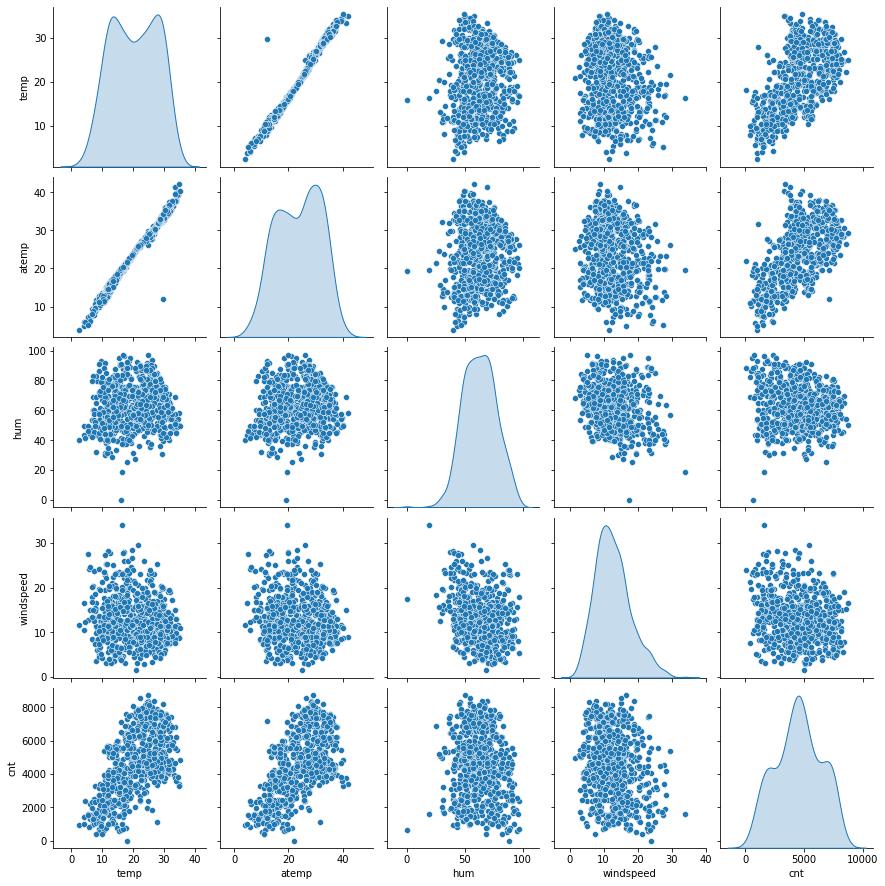

In [109]:
df_num=df[[ 'temp', 'atemp', 'hum', 'windspeed','cnt']]

sns.pairplot(df_num, diag_kind='kde')
plt.show()

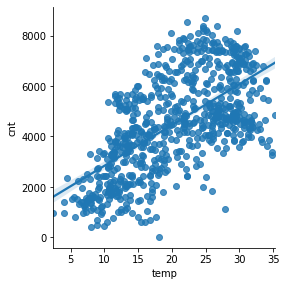

In [111]:
sns.pairplot(df, x_vars=['temp'], y_vars='cnt',size=4, aspect=1, kind='reg')
plt.show()

#### <font color= purple >Inference :
    
<font color=Teal>
    We can observe a strong linear relationship between the important variable temp and cnt (target) variable.
    Hence our assumption for linear regression is valid.

### Assumption 2 - Error terms are normally distributed with mean zero
#### Residual Analysis Of Training Data

In [86]:
y_train_pred = lr6.predict(X_train_lm6)

Text(0.5, 0, 'Errors')

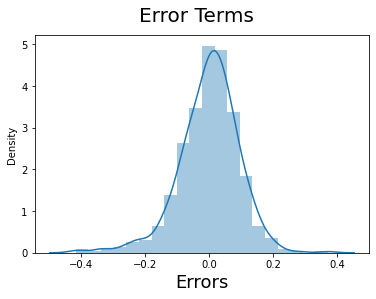

In [87]:
res = y_train - y_train_pred

# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

#### <font color= purple >Inference :
    
<font color=Teal> From the above histogram, we could see that the residuals are normally distributed.Hence our assumption for Linear Regression is valid.

### Assumption 3 - Independence of residuals

Autocorrelation refers to the fact that observations’ errors are correlated. To verify that the observations are not auto-correlated, we can use the Durbin-Watson test. The test will output values between 0 and 4. The closer it is to 2, the less auto-correlation there is between the various variables.

0 – 2: positive auto-correlation
2 – 4: negative auto-correlation)


In [107]:
print('The Durbin-Watson value for Final Model lr 6 is',round(sm.stats.stattools.durbin_watson((y_train - y_train_pred)),4))

The Durbin-Watson value for Final Model lr 6 is 2.0311


#### <font color= purple >Inference :
    
<font color=Teal> There is almost no autocorrelation.

### Assumption 4 - Constant variance of error terms(homoscedasticity)


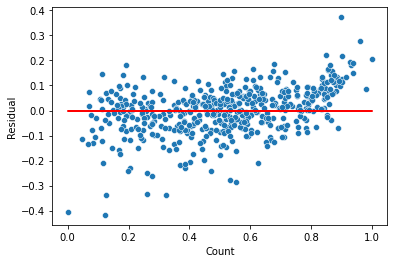

In [104]:
y_train_pred = lr6.predict(X_train_lm6)
residual = y_train - y_train_pred
sns.scatterplot(y_train,residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()



#### <font color= purple >Inference :
    
<font color=Teal> There is no visible pattern in residual values, thus homoscedacity is well preserved

###  No Multicollinearity between the predictor variables

In [88]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,3.92
0,yr,1.94
3,season_summer,1.78
5,mnth_8,1.56
4,season_winter,1.47
8,weathersit_Mist_cloudy,1.44
6,mnth_9,1.29
7,weathersit_Light rain_Light snow_Thunderstorm,1.06
1,holiday,1.03



#### <font color= purple >Inference :
    
<font color=Teal> The above VIF calculation help us find that there is no multicollinearity existing between the predictor variables, as all the values are within permissible range of below 5.

### PREDICTION


In [89]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [90]:
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_11,mnth_12,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light rain_Light snow_Thunderstorm,weathersit_Mist_cloudy
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,0,0,0,0,1,0,1
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,...,0,0,0,0,0,1,0,0,0,0
299,0,0,0,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,0,0,0,1,0,0,0,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,...,0,0,0,1,0,0,0,0,0,0


In [91]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_11,mnth_12,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light rain_Light snow_Thunderstorm,weathersit_Mist_cloudy
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.639269,0.558941,0.532991,0.638508,0.313350,0.520592,0.255708,0.264840,...,0.073059,0.086758,0.118721,0.173516,0.155251,0.141553,0.123288,0.155251,0.027397,0.319635
std,0.500722,0.188034,0.481313,0.233698,0.217888,0.148974,0.159947,0.218435,0.437258,0.442259,...,0.260830,0.282125,0.324202,0.379560,0.362974,0.349389,0.329520,0.362974,0.163612,0.467403
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [92]:
# Dividing into X-test and y-test

y_test = df_test.pop('cnt')
X_test = df_test

X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 29 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   yr                                             219 non-null    int64  
 1   holiday                                        219 non-null    int64  
 2   workingday                                     219 non-null    int64  
 3   temp                                           219 non-null    float64
 4   atemp                                          219 non-null    float64
 5   hum                                            219 non-null    float64
 6   windspeed                                      219 non-null    float64
 7   season_spring                                  219 non-null    uint8  
 8   season_summer                                  219 non-null    uint8  
 9   season_winter                                  219 no

In [93]:
#Selecting the variables that were part of final model.
col1=X_train_new.columns

X_test=X_test[col1]

# Adding constant variable to test dataframe
X_test_lm6 = sm.add_constant(X_test)

X_test_lm6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 10 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   const                                          219 non-null    float64
 1   yr                                             219 non-null    int64  
 2   holiday                                        219 non-null    int64  
 3   temp                                           219 non-null    float64
 4   season_summer                                  219 non-null    uint8  
 5   season_winter                                  219 non-null    uint8  
 6   mnth_8                                         219 non-null    uint8  
 7   mnth_9                                         219 non-null    uint8  
 8   weathersit_Light rain_Light snow_Thunderstorm  219 non-null    uint8  
 9   weathersit_Mist_cloudy                         219 no

In [94]:
# Making predictions using the final model (lr6)

y_pred = lr6.predict(X_test_lm6)

### Model Evaluation

Text(0, 0.5, 'y_pred')

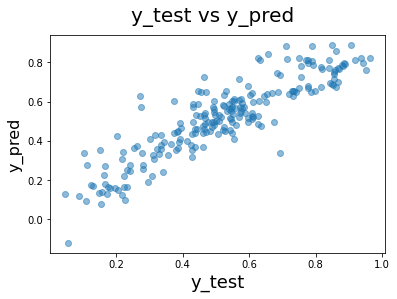

In [95]:
# let's plot y_test and y_pred to understand the spread


fig = plt.figure()
plt.scatter(y_test, y_pred, alpha=.5)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 

### Test data - R^2


In [96]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7964731574157414

### Test data - Adjusted R^2 



In [100]:
# n is number of rows in X

# Formula 𝑅2𝑎𝑑𝑗.=1−(1−𝑅2)∗𝑛−1𝑛−𝑝−1 
n = X_test.shape[0]


# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula
r2=0.7964731574157414
adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.7877088436202471

### <font color=purple> Inference : 
<font color=Teal> 
    
#### Train data :
    
- R-squared : 0.823    
- Adj. R-squared: 0.819
    
#### Test data : 
- R-squared : 0.796
- Adj. R-squared: 0.787
    
    
- There is no much difference between R^2 and adjusted R^2 of trian and test data respectively.
- Also the difference between train R^2 and test R^2 is 2.7% and difference between train adjusted R^2 and test adjusted R^2 is 3.2% .

#### - The  predictor variables that influences the bike booking more are: 

- Temperature (temp) - A coefficient value of ‘0.539040’ indicated that a unit increase in temp variable increases the bike rentals by 0.539040 units.

- Weathersit_Mist_Cloudy (weathersit_2) - A coefficient value of ‘-0.080930’ indicated that a unit increase in Weathersit_Mist_Cloudy variable decreases the bike rentals by 0.080930 units.

- weathersit_Light rain_Light snow_Thunderstorm  (weathersit_3) - A coefficient value of ‘-0.297362’ indicated that a unit increase in weathersit_Light rain_Light snow_Thunderstorm variable decreases the bike rentals by 0.297362 units.

- Year (yr) - A coefficient value of ‘0.231263’ indicated that a unit increase in yr variable increases the bike rentals by 0.231263 units.

- holiday - A coefficient value of ‘0.100177’ indicated that a unit increase in holiday variable decreases the bike rentals by 0.100177 units.Hence bike rentals are more on working days than holidays.